# Figure 5

The code in this notebook was last tested with:

* python version 3.7.12
* numpy 1.20.3
* pandas 1.3.5
* matplotlib 3.4.2
* scipy 1.7.0
* seaborn 0.11.1

Below we generate Figure 5.

In [9]:
import numpy as np
from scipy.stats import t
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style('ticks')
sns.set_context('talk')

In [5]:
red = sns.xkcd_rgb['pale red']
gre = sns.xkcd_rgb['light green'] 

* **par**: parent
* **pro**: progeny

In [6]:
data = pd.read_csv('data/Figure_5_data.csv', nrows=1001)
data

,generation,par_fitness_mean,pro_fitness_mean,par_fitness_std,pro_fitness_std
0,0,1.159274,1.160770,2.220446e-16,0.001198
1,1,1.159297,1.160797,4.248861e-06,0.001202
2,2,1.159320,1.160876,6.771509e-06,0.001192
3,3,1.159342,1.160922,9.532669e-06,0.001210
4,4,1.159365,1.160998,1.314725e-05,0.001264
...,...,...,...,...,...
996,996,1.612180,1.821872,7.382720e-02,0.086231
997,997,1.612743,1.822439,7.393556e-02,0.086232
998,998,1.613373,1.823110,7.404501e-02,0.086231
999,999,1.614011,1.823875,7.411450e-02,0.086305


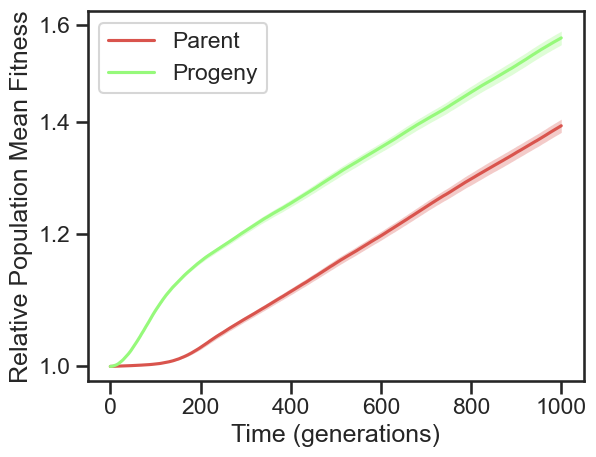

In [13]:
nReps = 100
w1 = data['par_fitness_mean'] / data['par_fitness_mean'][0]
w2 = data['pro_fitness_mean'] / data['pro_fitness_mean'][0]
rv = t(nReps-1)
tq = rv.ppf(.975)
w1ci = tq * (data['par_fitness_std'] / data['par_fitness_mean'][0]) / np.sqrt(nReps)
w2ci = tq * (data['pro_fitness_std'] / data['pro_fitness_mean'][0]) / np.sqrt(nReps) 
plt.semilogy(data['generation'], w1, label='Parent', color=red)
plt.fill_between(data['generation'], w1 - w1ci, w1 + w1ci, alpha=.3, color=red, lw=.001)
plt.plot(data['generation'], w2, label='Progeny', color=gre)
plt.fill_between(data['generation'], w2 - w2ci, w2 + w2ci, alpha=.3, color=gre, lw=.001)
plt.yticks(ticks=np.arange(1, 1.61, .2), labels=np.arange(1, 1.61, .2).round(2))
plt.ylim(.98, 1.63)
plt.minorticks_off()
plt.ylabel('Relative Population Mean Fitness')
plt.xlabel('Time (generations)')
plt.legend();